In [55]:
import pandas as pd

In [56]:
# load the dataset
data = pd.read_csv('feature_seln_new.csv', parse_dates=['START_TIME'], index_col='START_TIME')
df=data[data.columns[1:]]

In [57]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 5]

lamda_list = [3.5,4,4.5,5,5.5,6] 
window_size_list = [24,36,48,60,72,84]

len_lamda=len(lamda_list)
len_window=len(window_size_list)
count=len_lamda*len_window

no_col = len(df.columns)
no_rows = df.shape[0]

anomalies_array = np.zeros((len(lamda_list), len(window_size_list)))

df1 = pd.DataFrame({'Lamda': [3.5,3.5,3.5,3.5,3.5,3.5,4,4,4,4,4,4,4.5,4.5,4.5,4.5,4.5,4.5,5,5,5,5,5,5,5.5,5.5,5.5,5.5,5.5,5.5,6,6,6,6,6,6],
        'Window_size': [24,36,48,60,72,84,24,36,48,60,72,84,24,36,48,60,72,84,24,36,48,60,72,84,24,36,48,60,72,84,24,36,48,60,72,84]
       })

df1['p_anomalies'] = pd.Series([0]*count)
i=0

for lamda in lamda_list:
    for window_size in window_size_list:
        col_anomalies=0
        for col in df.columns:
            rolling_mean = df[col].rolling(window=window_size).mean()
            std = df[col].rolling(window=window_size).std()
            threshold = lamda * std
            upper_limit = rolling_mean + threshold
            lower_limit = rolling_mean - threshold
            anomalies = (df[col] > upper_limit) | (df[col] < lower_limit)
            num_anomalies = anomalies.sum()
            col_anomalies=col_anomalies+num_anomalies
            
        avg_anomalies=col_anomalies/no_col
        df1.loc[i, 'p_anomalies'] = (avg_anomalies*100)/no_rows
        i+=1
                
Minimum_value = df1['p_anomalies'].min()
Minimum_index = df1.loc[df1['p_anomalies'] == Minimum_value]
min_lamda=6.0
min_window_size=84
print(Minimum_value)
print(Minimum_index)
print(df1)


            


5.3341265119968275
    Lamda  Window_size  p_anomalies
35    6.0           84     5.334127
    Lamda  Window_size  p_anomalies
0     3.5           24    10.794666
1     3.5           36     9.167823
2     3.5           48     8.186265
3     3.5           60     7.335250
4     3.5           72     6.713101
5     3.5           84     6.312380
6     4.0           24    10.415427
7     4.0           36     8.828244
8     4.0           48     7.845859
9     4.0           60     6.974189
10    4.0           72     6.386741
11    4.0           84     5.958755
12    4.5           24    10.167559
13    4.5           36     8.488664
14    4.5           48     7.624430
15    4.5           60     6.734583
16    4.5           72     6.170269
17    4.5           84     5.716670
18    5.0           24     9.780058
19    5.0           36     8.334160
20    5.0           48     7.398043
21    5.0           60     6.579252
22    5.0           72     5.972801
23    5.0           84     5.580342
24    5.5

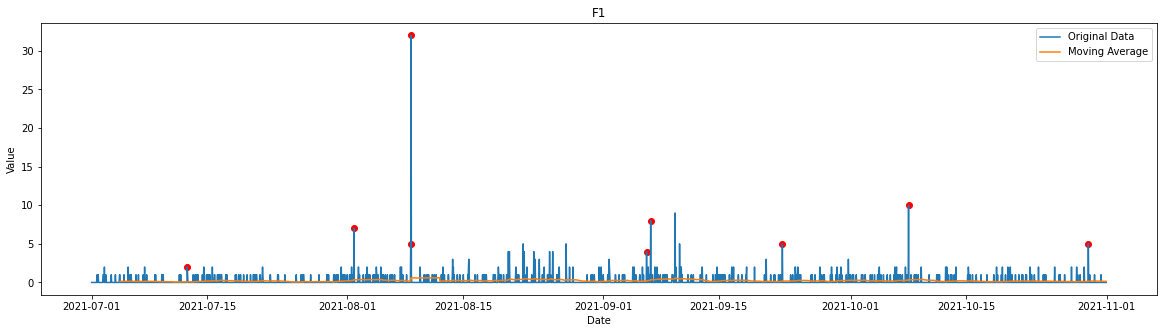

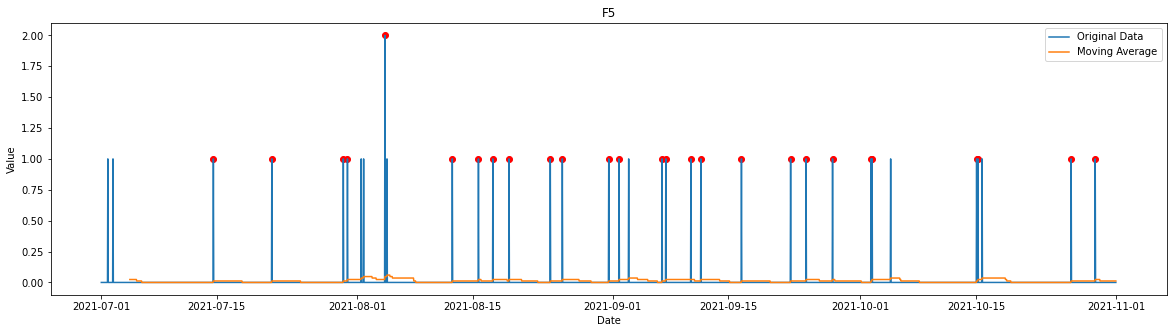

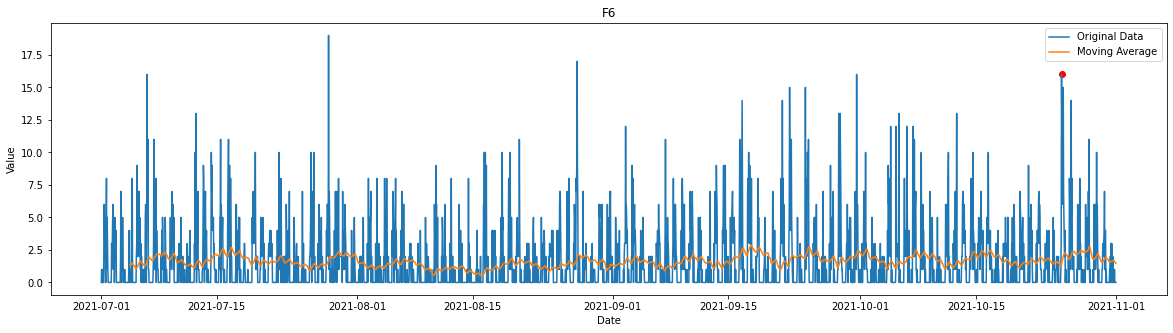

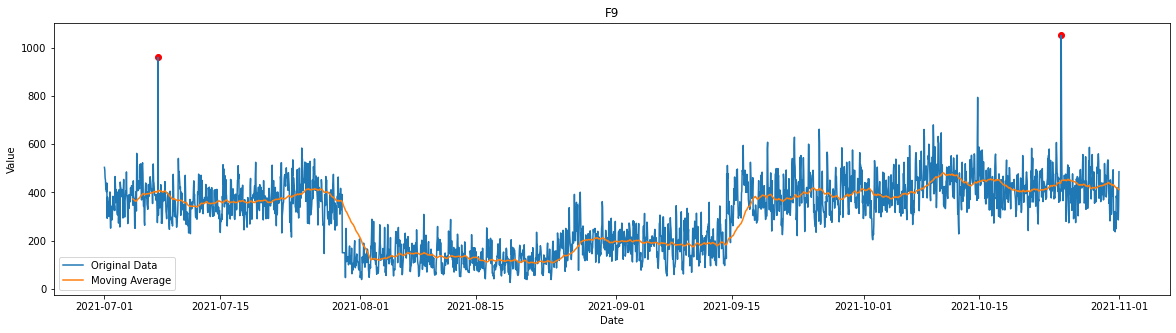

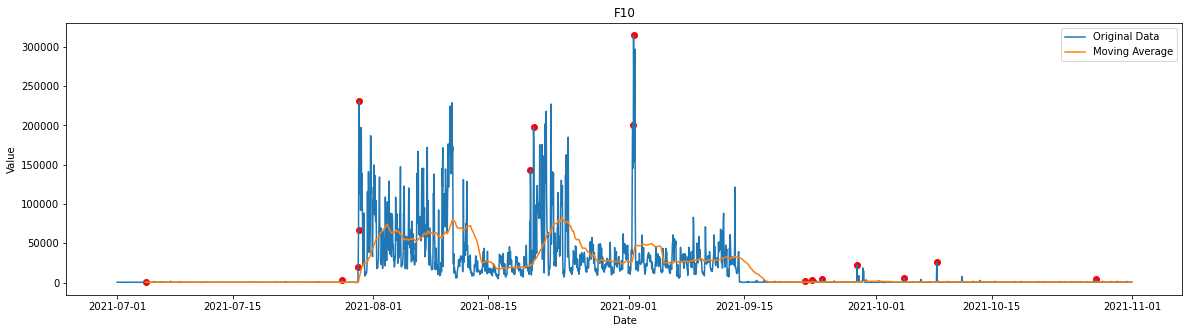

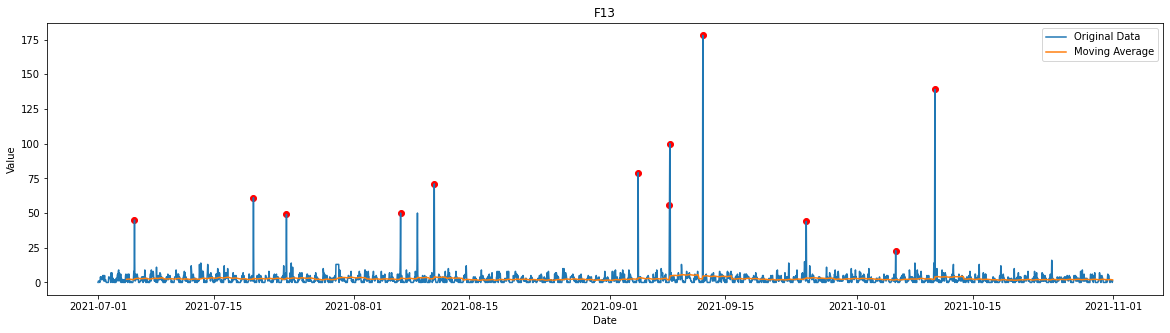

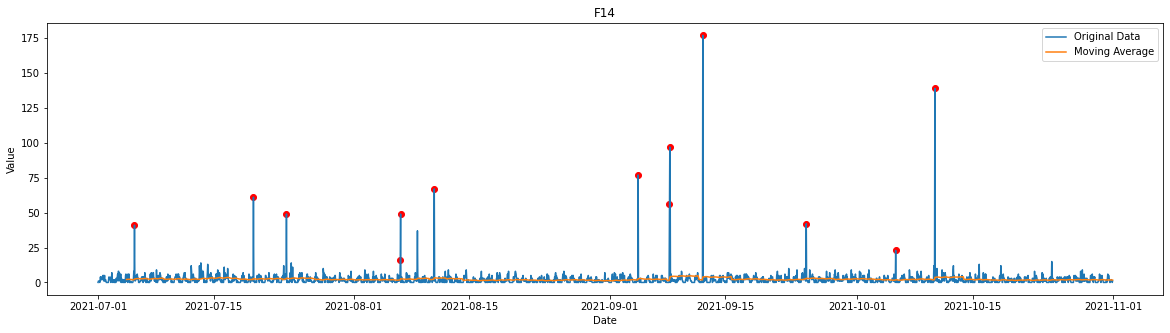

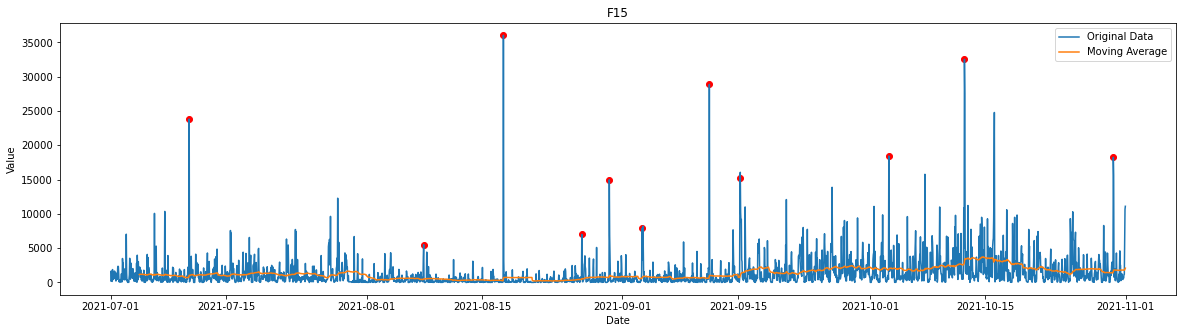

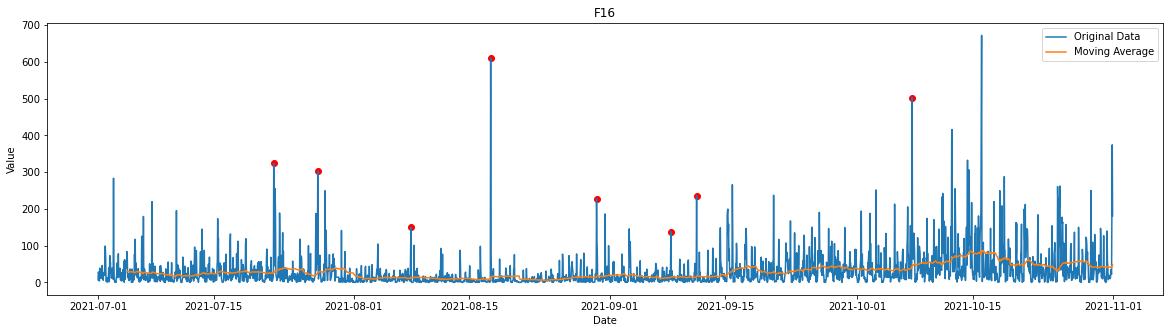

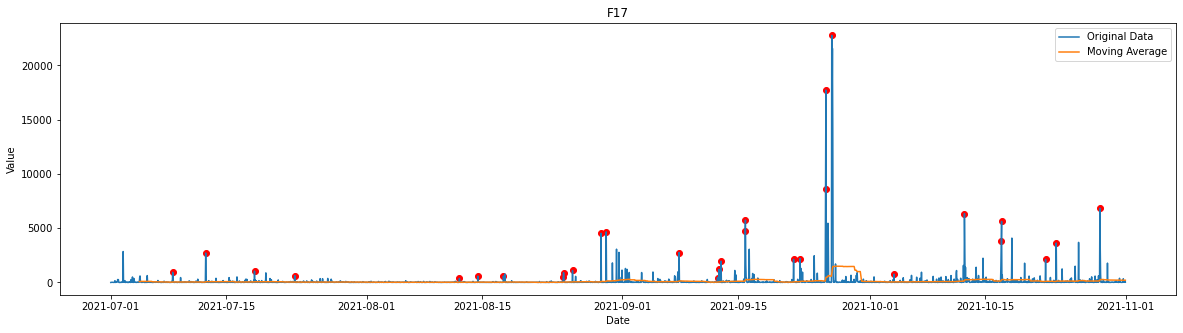

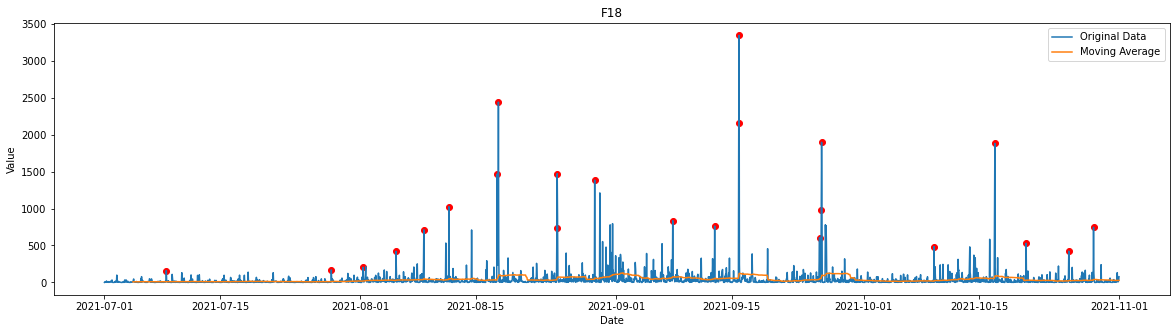

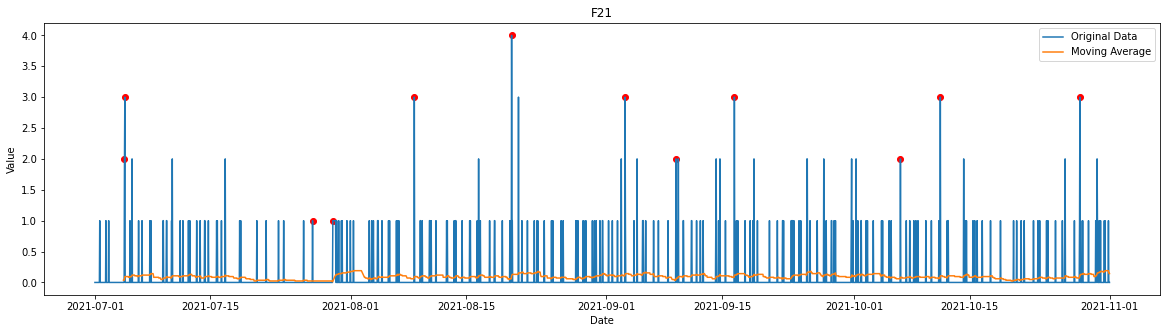

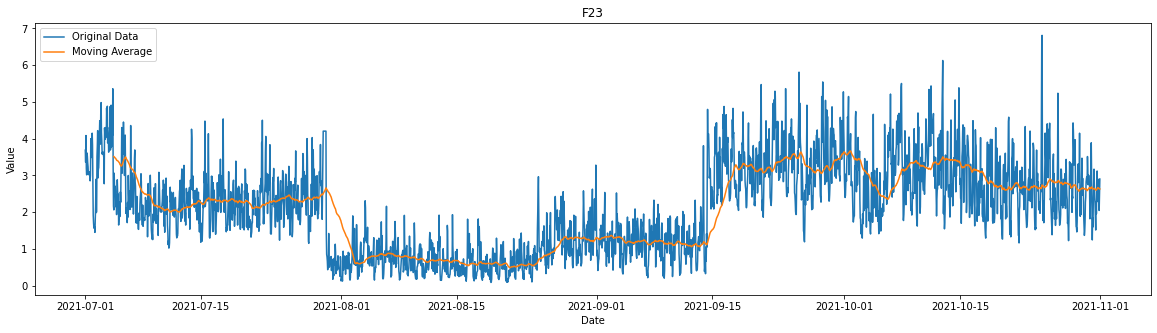

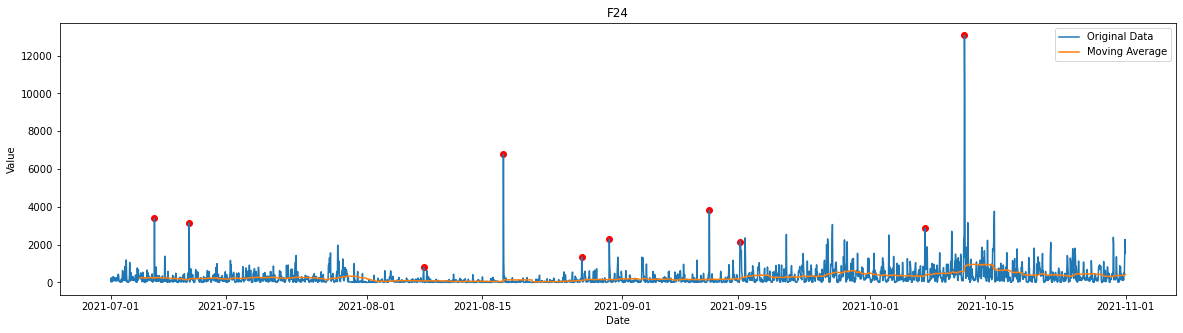

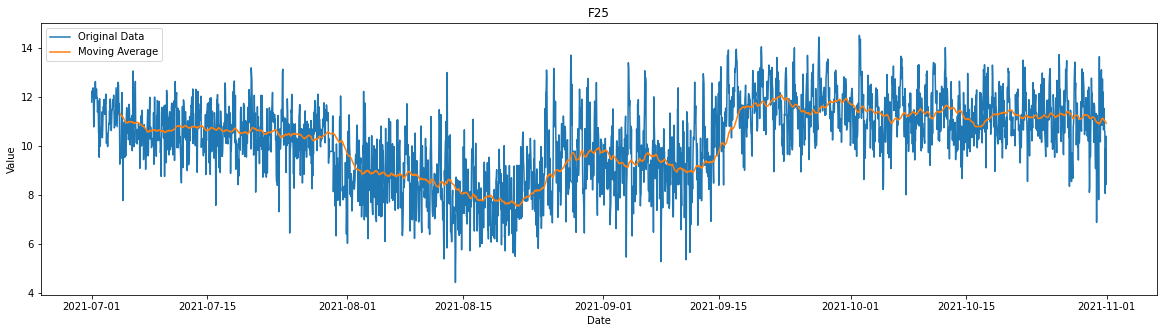

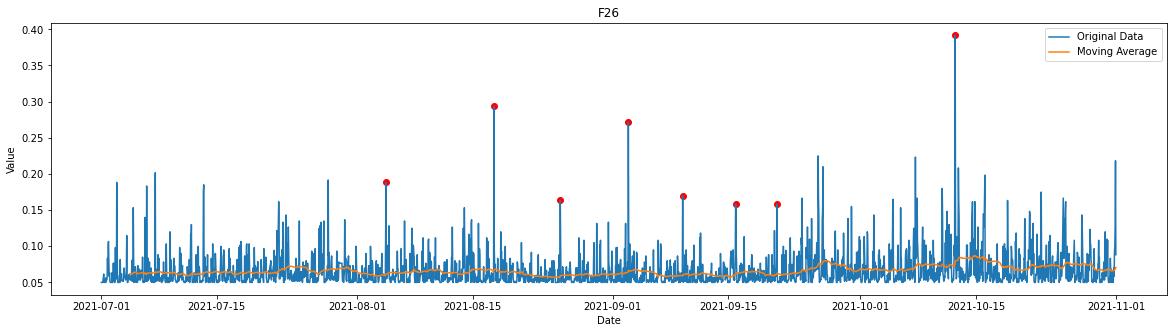

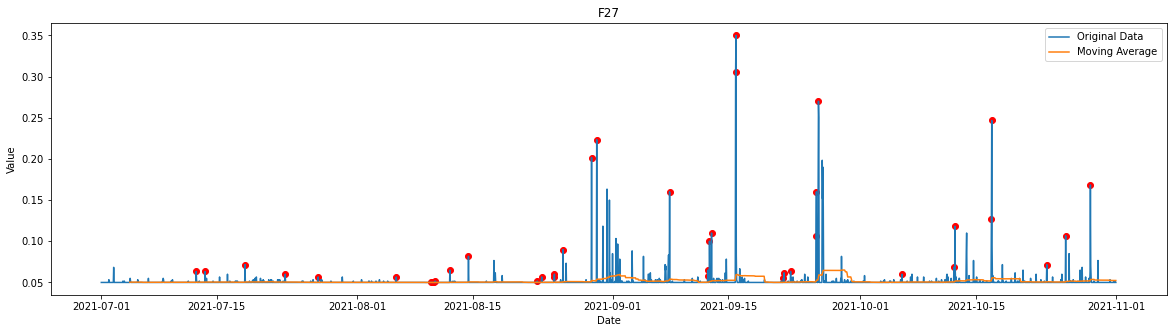

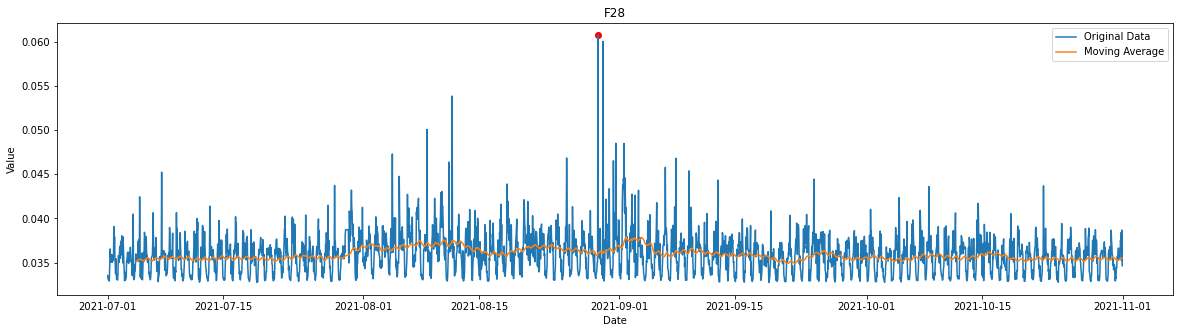

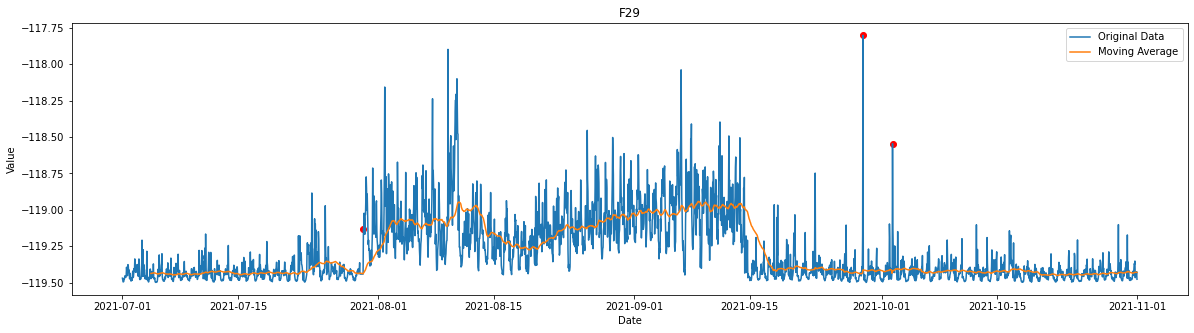

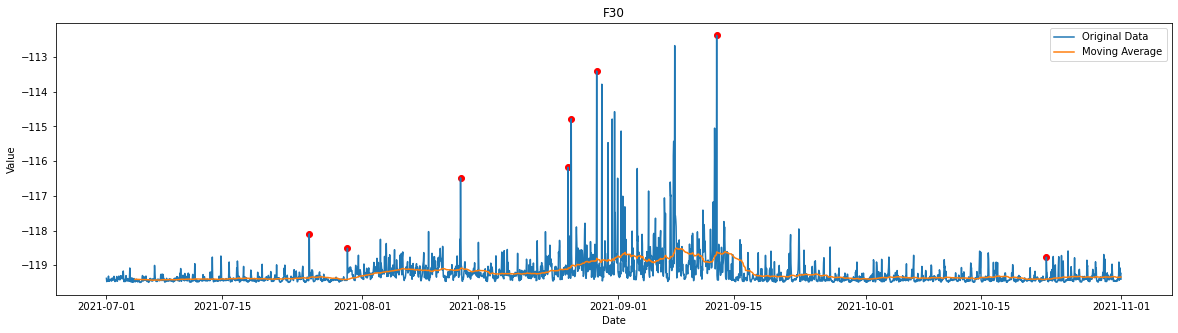

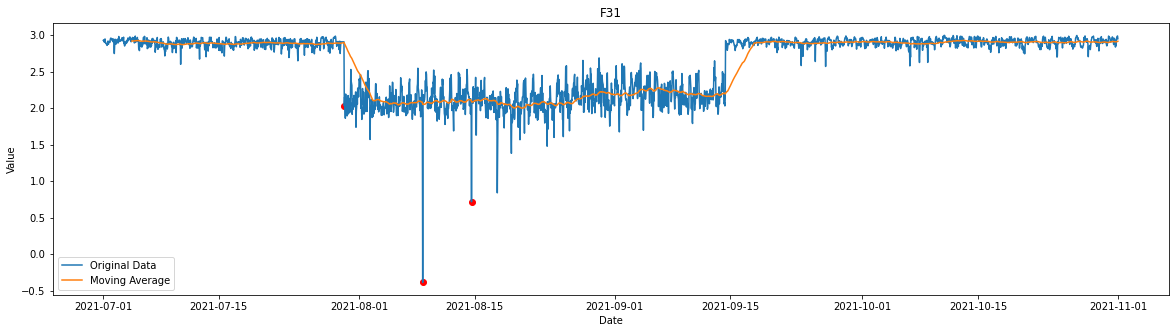

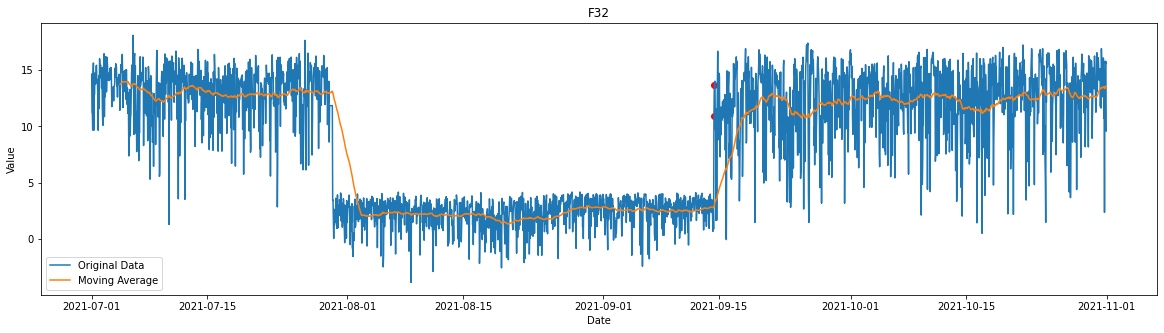

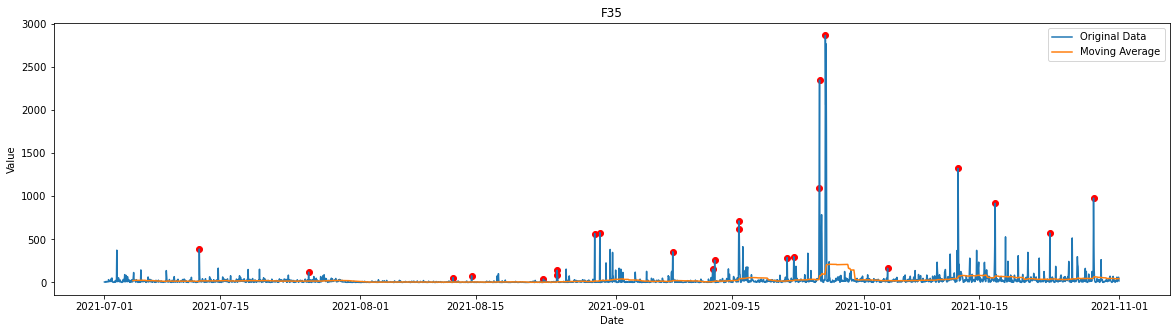

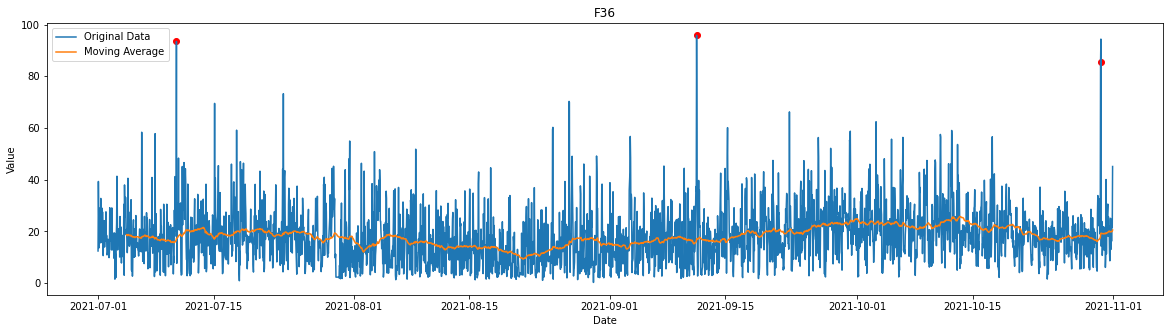

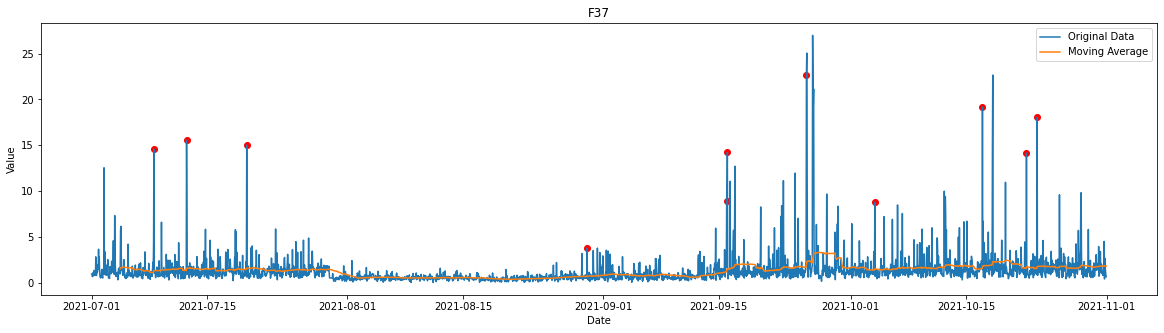

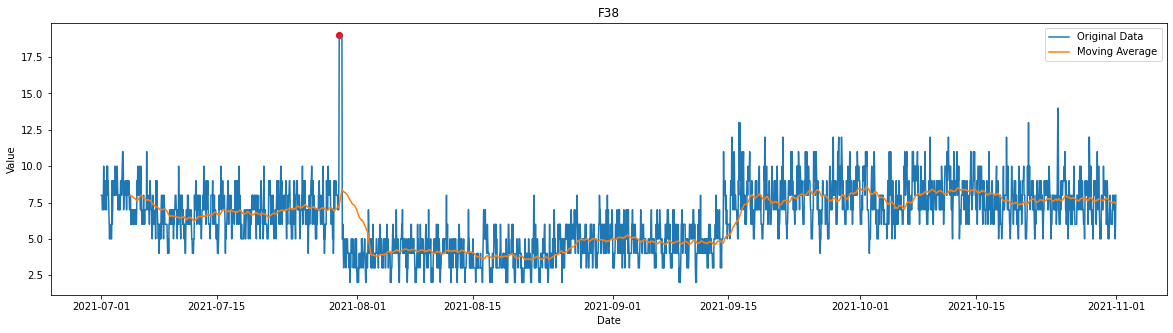

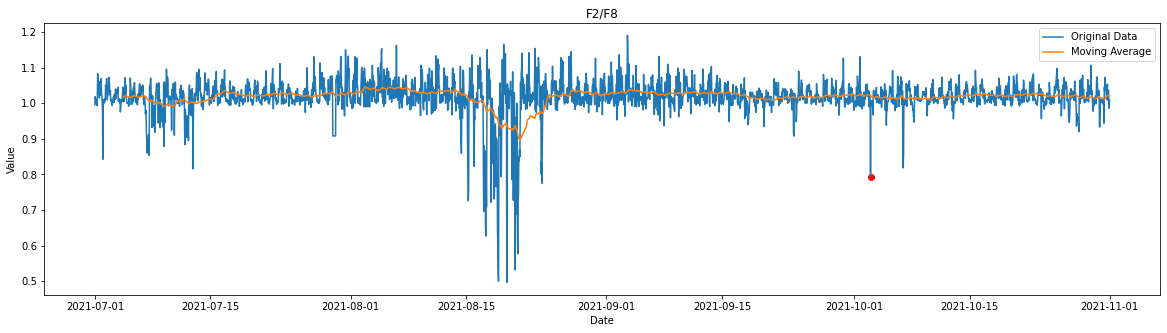

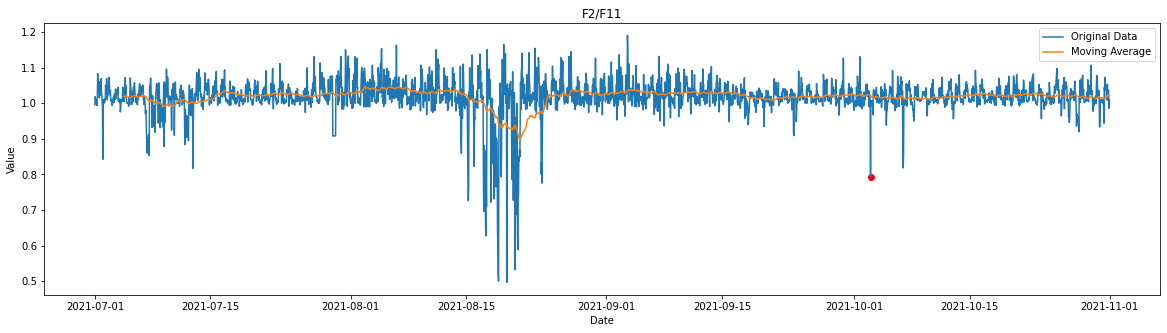

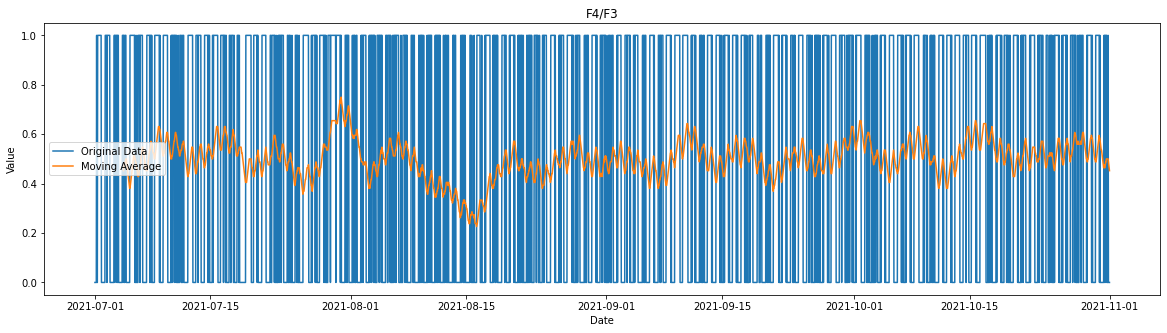

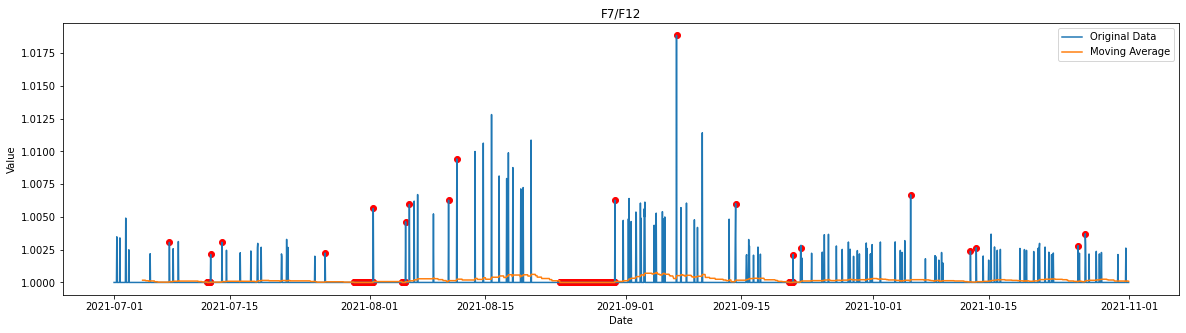

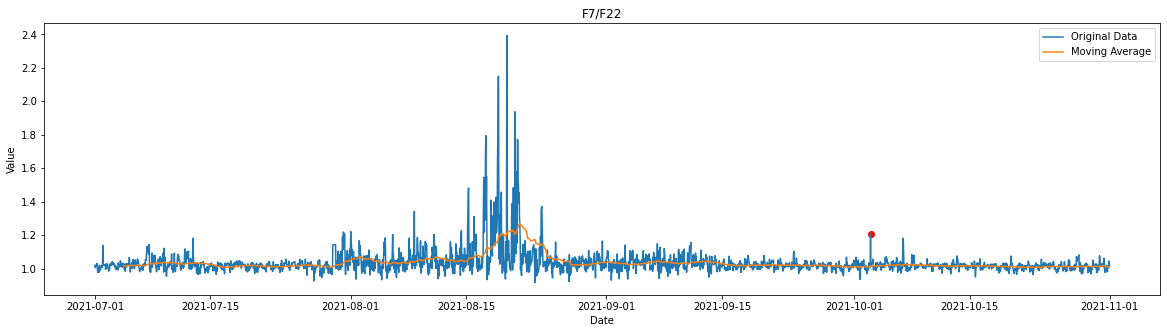

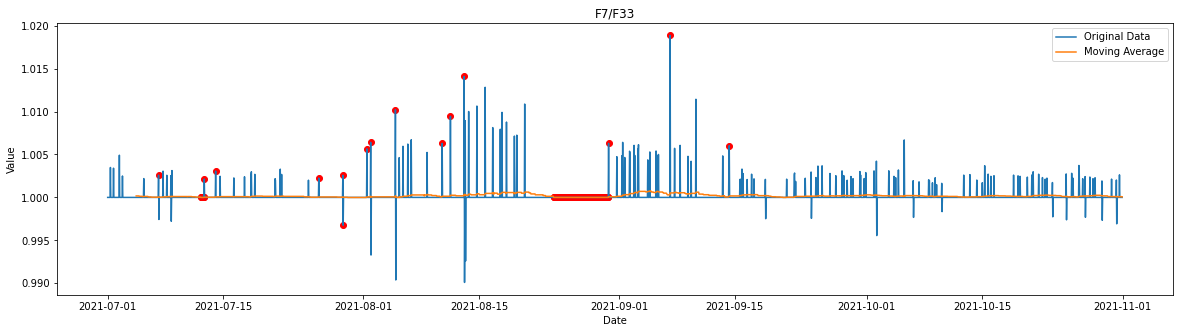

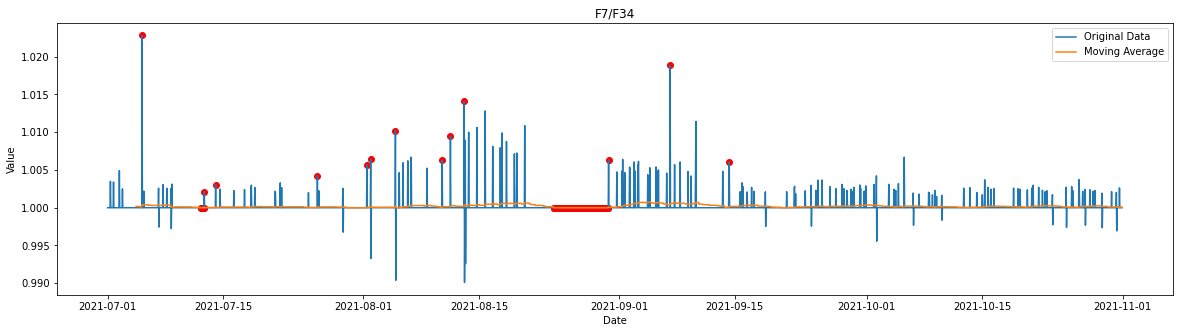

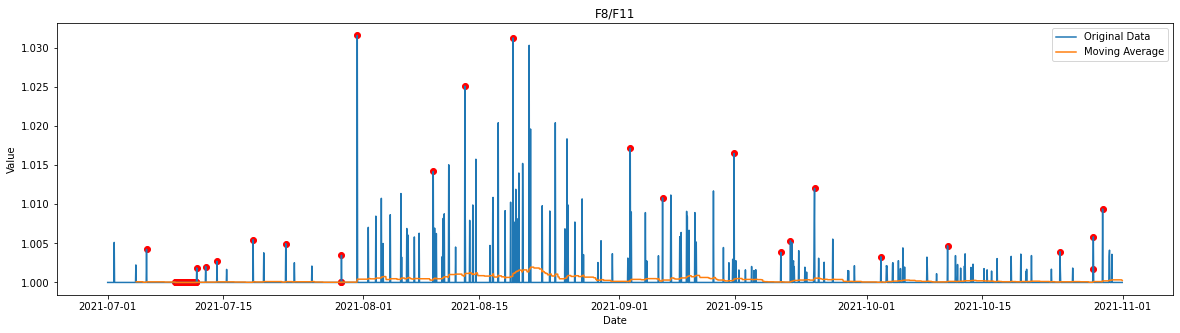

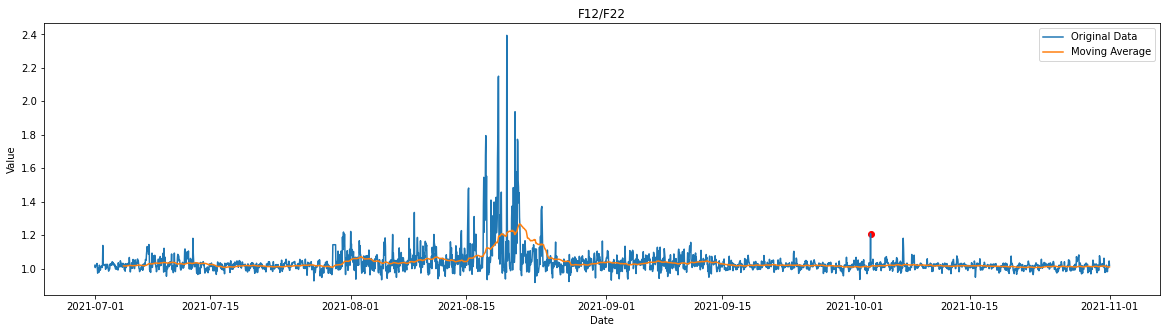

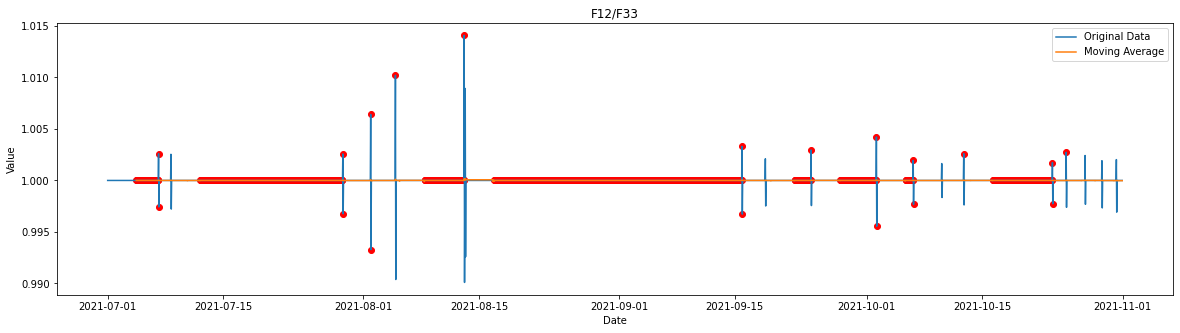

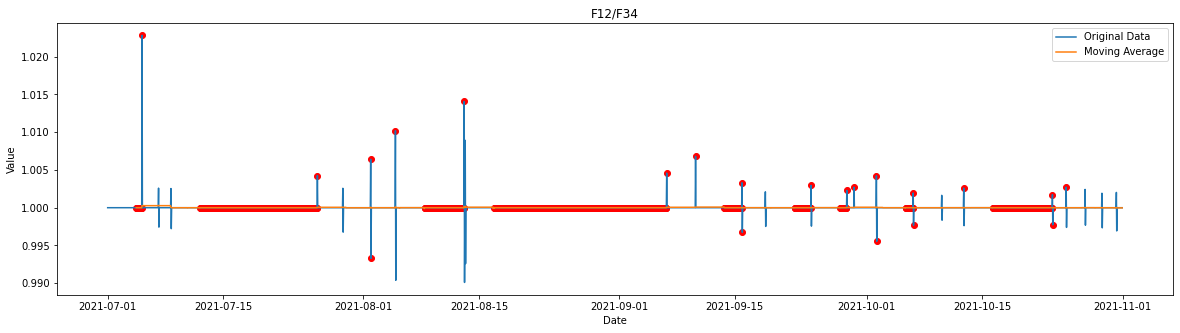

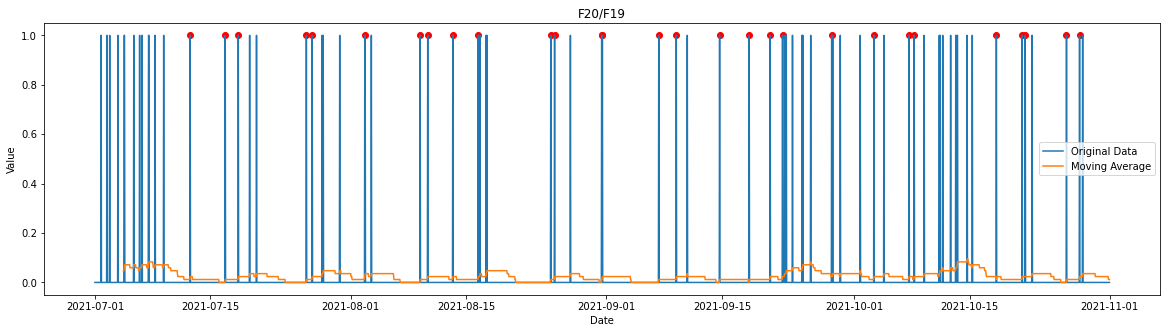

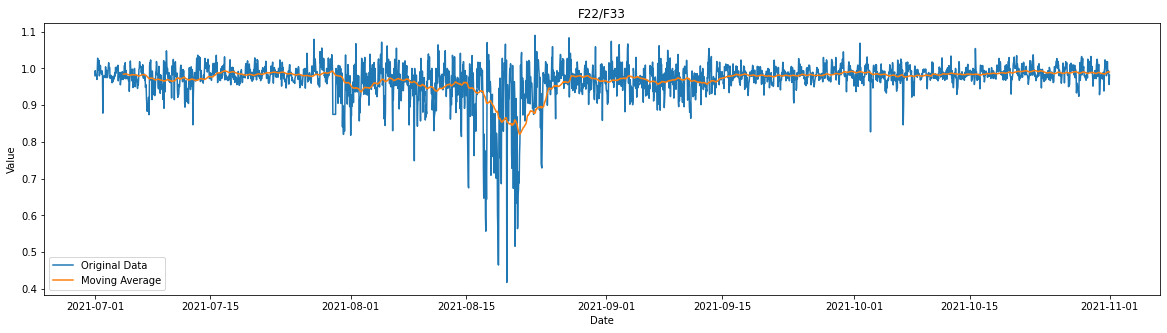

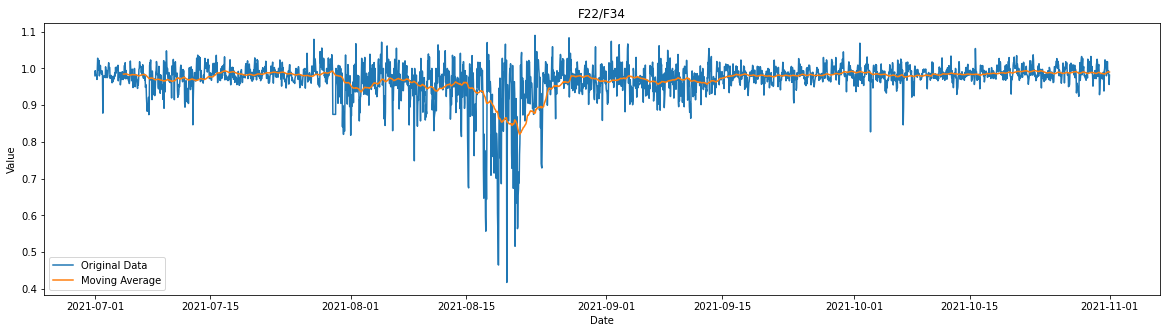

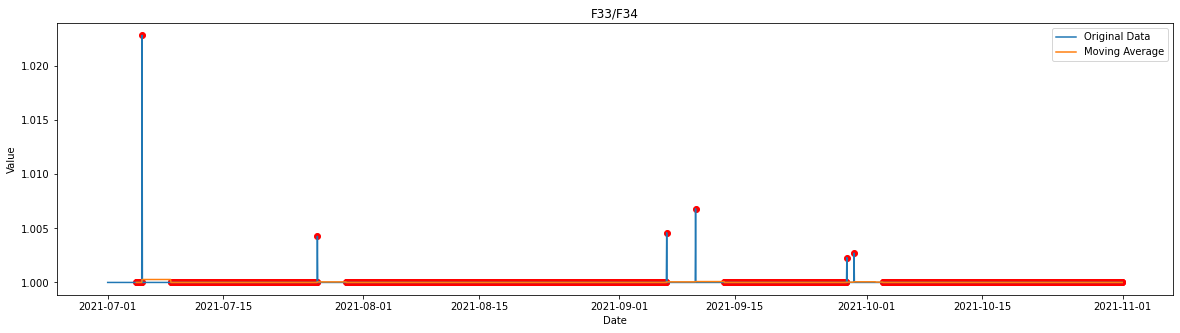

In [58]:
for col in df.columns:
    la=min_lamda
    w=min_window_size
    rolling_mean = df[col].rolling(window=w).mean()
    std = df[col].rolling(window=w).std()
    threshold = la * std
    plt.plot(df.index, df[col], label='Original Data')
    plt.plot(rolling_mean.index, rolling_mean, label='Moving Average')
    plt.legend(loc='best')
    upper_limit = rolling_mean + threshold
    lower_limit = rolling_mean - threshold
    anomalies = (df[col] > upper_limit) | (df[col] < lower_limit)
    plt.scatter(df.index[anomalies], df[col][anomalies], color='red', label='Anomalies')
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Value')
    #col_name = col.replace("/", " divided by ")
    #plt.savefig(f"{col_name}_moving_avg_lamda_{lamda}_window_{window_size}.png")
    plt.show()